In [1]:
import numpy as np
import scipy as sp
import sympy as smp
from sympy import I
from scipy.special import voigt_profile
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import cumulative_trapezoid

Equivalent width is: 8.939


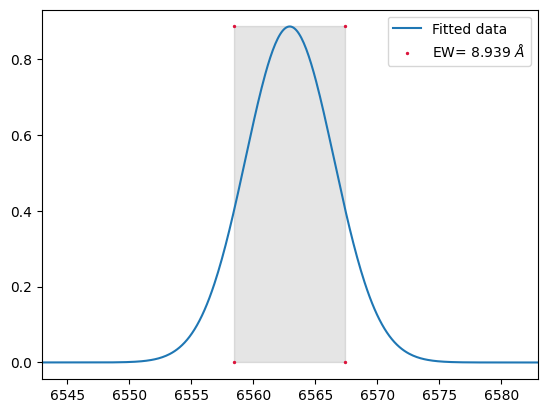

In [ ]:
##### Gaussian symbolic definition
x = smp.symbols('x', real=True)
amp = smp.symbols('A', real=True)
mu = smp.symbols('mu', real=True)
sigma = smp.symbols('sigma', real=True)
f = amp/(sigma * smp.sqrt(2 * np.pi)) * smp.exp(-(x-mu)**2/(2 * sigma**2)) # Gaussian according to https://lmfit.github.io/lmfit-py/builtin_models.html#gaussianmodel
f

smp.integrate(f, (x, -smp.oo, smp.oo))

f = lambda x: a/(b * np.sqrt(2 * np.pi)) * np.exp(-(x-c)**2/(2 * b**2))
a,b,c = 7.922,3.566,6562.93 #input the values for amplitude, width, centre of peak
height = 0.398942280401433*a/b #Get the true height of the peak
FULL_integral = quad(f, 6400, 6700)[0] #this is the full value if the fitted function is integrated

step_size = 0.00001 #step size with which the rectangle width is increased until that rectangle has the same area as the full integral
delta = 0 # Place holder variables up to PART_integral, this one is for the size of the move away from the centre
left = 0 # The left point where the EW measurement is taken 
right = 0 # The right point where the EW measurement is taken
PART_integral = 0 #Area of the rectangle used to find EW

while(PART_integral<=FULL_integral):
    delta = delta+step_size
    left = c - delta
    right= c + delta
    PART_integral = height * (2*delta)
    # print(PART_integral,FULL_integral)
EW = right-left
print(f"Equivalent width is: {round(EW,3)}")


def func(x): #This is just for plotting so use the definitions I already made.
    a,b,c = 7.922,3.566,6562.93 #Values for Amplitude (not height!), width (sigma) and centre of the  fitted curve (mu)
    return a/(b * np.sqrt(2 * np.pi)) * np.exp(-(x-c)**2/(2 * b**2))

xvals=np.linspace(6500,6600,1000)
yvals=[]
for i in range(0,len(xvals)):
    yvals.append(func(xvals[i]))
plt.plot(xvals,yvals, label="Fitted data")
plt.fill_betweenx([min(yvals),max(yvals)],left,right, alpha=0.1,color="black")
plt.scatter([left,right,right,left],[height,height,0,0], s=2, color="crimson",label=rf"EW= {round(EW,3)} $\AA$")
plt.xlim(c-20,c+20)
plt.legend(fontsize=10)
plt.show()




Equivalent width is: 11.032


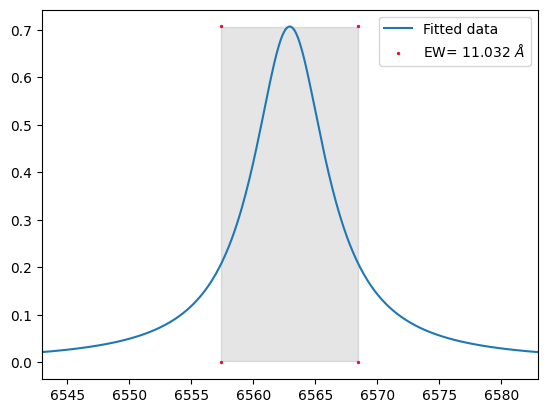

In [20]:
##### Lorentzian symbolic definition
x = smp.symbols('x', real=True)
amp = smp.symbols('A', real=True)
mu = smp.symbols('mu', real=True)
sigma = smp.symbols('sigma', real=True)
# gam = smp.symbols('g', real=True)
f = amp/(np.pi) * (sigma/((x-mu)**2+sigma**2)) # Lorentzian according to https://lmfit.github.io/lmfit-py/builtin_models.html#lorentzianmodel
f


smp.integrate(f, (x, -smp.oo, smp.oo))

f = lambda x: a/(np.pi) * (b/((x-c)**2+b**2))
a,b,c = 7.922,3.566,6562.93 #input the values for amplitude, width, centre of peak
height = 0.3183099*a/b #Get the true height of the peak
FULL_integral = quad(f, 6400, 6700)[0] #this is the full value if the fitted function is integrated

step_size = 0.00001 #step size with which the rectangle width is increased until that rectangle has the same area as the full integral
delta = 0 # Place holder variables up to PART_integral, this one is for the size of the move away from the centre
left = 0 # The left point where the EW measurement is taken 
right = 0 # The right point where the EW measurement is taken
PART_integral = 0 #Area of the rectangle used to find EW

while(PART_integral<=FULL_integral):
    delta = delta+step_size
    left = c - delta
    right= c + delta
    PART_integral = height * (2*delta)
    # print(PART_integral,FULL_integral)
EW = right-left
print(f"Equivalent width is: {round(EW,3)}")


def func(x): #This is just for plotting so use the definitions I already made.
    a,b,c = 7.922,3.566,6562.93 #Values for Amplitude (not height!), width (sigma) and centre of the  fitted curve (mu)
    return a/(np.pi) * (b/((x-c)**2+b**2))

xvals=np.linspace(6500,6600,1000)
yvals=[]
for i in range(0,len(xvals)):
    yvals.append(func(xvals[i]))
plt.plot(xvals,yvals, label="Fitted data")
plt.fill_betweenx([min(yvals),max(yvals)],left,right, alpha=0.1,color="black")
plt.scatter([left,right,right,left],[height,height,0,0], s=2, color="crimson",label=rf"EW= {round(EW,3)} $\AA$")
plt.xlim(c-20,c+20)
plt.legend(fontsize=10)
plt.show()



[6500.         6500.1001001  6500.2002002  6500.3003003  6500.4004004
 6500.5005005  6500.6006006  6500.7007007  6500.8008008  6500.9009009
 6501.001001   6501.1011011  6501.2012012  6501.3013013  6501.4014014
 6501.5015015  6501.6016016  6501.7017017  6501.8018018  6501.9019019
 6502.002002   6502.1021021  6502.2022022  6502.3023023  6502.4024024
 6502.5025025  6502.6026026  6502.7027027  6502.8028028  6502.9029029
 6503.003003   6503.1031031  6503.2032032  6503.3033033  6503.4034034
 6503.5035035  6503.6036036  6503.7037037  6503.8038038  6503.9039039
 6504.004004   6504.1041041  6504.2042042  6504.3043043  6504.4044044
 6504.5045045  6504.6046046  6504.7047047  6504.8048048  6504.9049049
 6505.00500501 6505.10510511 6505.20520521 6505.30530531 6505.40540541
 6505.50550551 6505.60560561 6505.70570571 6505.80580581 6505.90590591
 6506.00600601 6506.10610611 6506.20620621 6506.30630631 6506.40640641
 6506.50650651 6506.60660661 6506.70670671 6506.80680681 6506.90690691
 6507.00700701 6

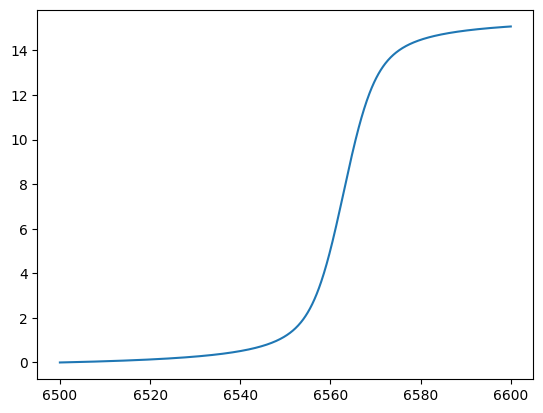

[0.00000000e+00 4.58267357e-04 9.18006822e-04 1.37922552e-03
 1.84193061e-03 2.30612931e-03 2.77182887e-03 3.23903662e-03
 3.70775989e-03 4.17800610e-03 4.64978269e-03 5.12309717e-03
 5.59795707e-03 6.07437001e-03 6.55234364e-03 7.03188564e-03
 7.51300377e-03 7.99570583e-03 8.47999967e-03 8.96589321e-03
 9.45339439e-03 9.94251123e-03 1.04332518e-02 1.09256242e-02
 1.14196366e-02 1.19152972e-02 1.24126144e-02 1.29115964e-02
 1.34122517e-02 1.39145887e-02 1.44186159e-02 1.49243419e-02
 1.54317753e-02 1.59409247e-02 1.64517990e-02 1.69644069e-02
 1.74787573e-02 1.79948591e-02 1.85127213e-02 1.90323529e-02
 1.95537631e-02 2.00769610e-02 2.06019559e-02 2.11287569e-02
 2.16573736e-02 2.21878153e-02 2.27200916e-02 2.32542119e-02
 2.37901859e-02 2.43280234e-02 2.48677339e-02 2.54093275e-02
 2.59528140e-02 2.64982033e-02 2.70455054e-02 2.75947306e-02
 2.81458890e-02 2.86989907e-02 2.92540463e-02 2.98110659e-02
 3.03700602e-02 3.09310397e-02 3.14940149e-02 3.20589967e-02
 3.26259957e-02 3.319502

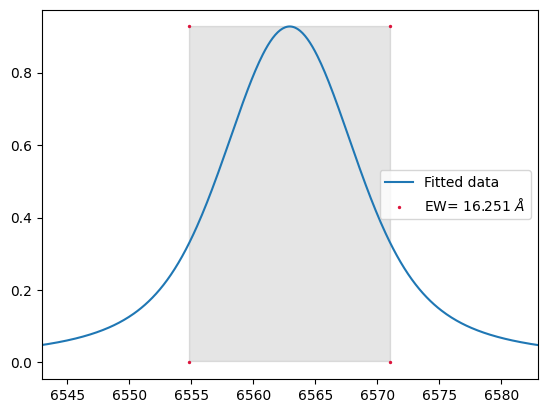

In [ ]:
##### Voigt symbolic definition
x = smp.symbols('x', real=True)
amp = smp.symbols('A', real=True)
mu = smp.symbols('mu', real=True)
sigma = smp.symbols('sigma', real=True)
gam = smp.symbols('gamma', real=True)

z = smp.symbols('z')
w = smp.symbols('w')

z=(x-mu+I*gam)/(sigma*smp.sqrt(2))
w=smp.exp(-z**2)*smp.erfc(-I*z)

f = (amp*smp.re(w))/(sigma*smp.sqrt(2*np.pi)) # Voigt according to https://lmfit.github.io/lmfit-py/builtin_models.html#voigtmodel
f


def func_voigt(x, amp, ctr, wid): #Fitting function voigt

    y = np.zeros_like(x)

    gam = wid
    y = y + voigt_profile(x - ctr, wid, gam) * amp
    return y

def func(x): #This is just for plotting so use the definitions I already made.
    a,b,c = 7.922,3.566,6562.93 #Values for Amplitude (not height!), width (sigma) and centre of the  fitted curve (mu)
    ans = func_voigt(x, a, c, b)
    return ans

xvals=np.linspace(6500,6600,1000)
yvals=[]
for i in range(0,len(xvals)):
    yvals.append(func(xvals[i]))
print(xvals,yvals)


a,b,c = 7.922,3.566,6562.93 #input the values for amplitude, width, centre of peak
f = func(xvals)
height = max(yvals) #Get the true height of the peak from LMfit params! just brute forcing it now to test this usecase
FULL_integral = cumulative_trapezoid(yvals, xvals, initial=0) #this is the full value if the fitted function is integrated
plt.plot(xvals,FULL_integral)
plt.show()
print(FULL_integral[:-1])

step_size = 0.00001 #step size with which the rectangle width is increased until that rectangle has the same area as the full integral
delta = 0 # Place holder variables up to PART_integral, this one is for the size of the move away from the centre
left = 0 # The left point where the EW measurement is taken 
right = 0 # The right point where the EW measurement is taken
PART_integral = 0 #Area of the rectangle used to find EW

while(PART_integral<=FULL_integral[-1]):
    delta = delta+step_size
    left = c - delta
    right= c + delta
    PART_integral = height * (2*delta)
    # print(PART_integral,FULL_integral)
EW = right-left
print(f"Equivalent width is: {round(EW,3)}")

plt.plot(xvals,yvals, label="Fitted data")
plt.fill_betweenx([min(yvals),max(yvals)],left,right, alpha=0.1,color="black")
plt.scatter([left,right,right,left],[height,height,0,0], s=2, color="crimson",label=rf"EW= {round(EW,3)} $\AA$")
plt.xlim(c-20,c+20)
plt.legend(fontsize=10)
plt.show()


In [13]:
smp.integrate(f, x)

0.199471140200716*sqrt(2)*sqrt(pi)*A*erf(sqrt(2)*(-mu + x)/(2*sigma))

In [14]:
smp.integrate(f, x).simplify()

-0.199471140200716*sqrt(2)*sqrt(pi)*A*erf(sqrt(2)*(mu - x)/(2*sigma))

In [ ]:
# f = smp.exp(x) / smp.sqrt(smp.exp(2*x) + 9)
smp.integrate(f, (x, 0, smp.log(4)))

-asinh(1/3) + asinh(4/3)

**Example** (Improper) Find $ \int_{0}^{\infty} \frac{16 \tan^{-1}(x)}{1+x^2} dx $

In [18]:
f = 16*smp.atan(x) / (1+x**2)
smp.integrate(f, (x, 0, smp.oo))

2*pi**2

## Part 2: "Unsolvable" Integrals

**Example**: Find $\int_{1}^{2} e^{-\sin(x)} dx$

Won't run

In [22]:
#f = smp.exp(-smp.sin(x))
#smp.integrate(f, (x, 1, 2)).simplify()

So we use scipy's `quad` function to integrate numerically

In [23]:
f = lambda x: np.exp(-np.sin(x))

In [28]:
f = lambda x: np.exp(-np.sin(x))
quad(f, 1, 2)

(0.3845918142796868, 4.2698268729567035e-15)

**Example**: Find $\int_{0}^{2\pi} \frac{1}{(a-\cos(x))^2 + (b-\sin(x))^2} dx$

In [ ]:
#f = 1/((a-smp.cos(x))**2 + (b-smp.sin(x))**2)
#smp.integrate(f, (x, 0, 2*smp.pi)).simplify()

This won't run as this does not have an analytical solution. We must solve it numerically, and thus we need choose values of $a$ and $b$ each time

In [31]:
f = lambda x: 1/((a-np.cos(x))**2 + (b-np.sin(x))**2)
a, b = 2, 3
quad(f, 0, 2*np.pi)

(0.5235987755982989, 1.9168823883823662e-13)

We can solve this for many different values of $a$ and $b$ quickly as follows:

In [38]:
def f(x, a, b):
    return 1/((a-np.cos(x))**2 + (b-np.sin(x))**2)

In [39]:
a_array = np.arange(2,10,1)
b_array = np.arange(2,10,1)
integrals = [[a, b, quad(f, 0, 2*np.pi, args=(a,b))[0]] for a in a_array for b in b_array]

# Numerical Case

This is the case where one collects actual data and wants to find the integral

**Example**: Electric Pulses in particle physics experiments

In [51]:
x, y = np.loadtxt('../Data/sample_data3.txt')

Suppose this is current measured $I(t)$

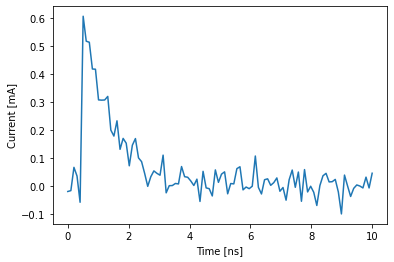

In [52]:
plt.plot(x,y)
plt.xlabel('Time [ns]')
plt.ylabel('Current [mA]')
plt.savefig('example.png', dpi=200)
plt.show()

Now in some detector experiments, energy is proportional to integrated current so $\text{Energy} \propto \int I(t) dt$

In [45]:
integral = cumulative_trapezoid(y,x, initial=0)

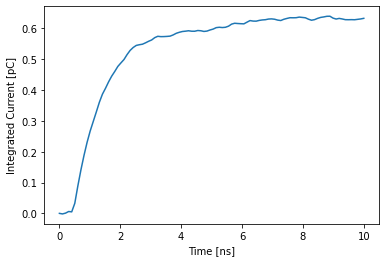

In [46]:
plt.plot(x, integral)
plt.xlabel('Time [ns]')
plt.ylabel('Integrated Current [pC]')
plt.show()

**Example**: Covid Data

In [47]:
x, y = np.loadtxt('../data/coviddata.txt')

Plot cases per day

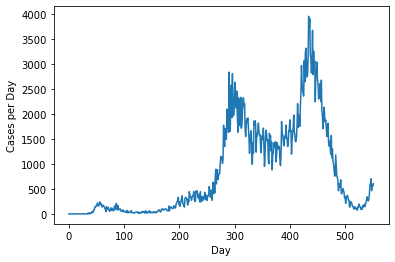

In [48]:
plt.plot(x,y)
plt.xlabel('Day')
plt.ylabel('Cases per Day')
plt.show()

Can find the cumulative number of cases by taking the integral

In [49]:
integral = cumulative_trapezoid(y,x, initial=0)

And plot

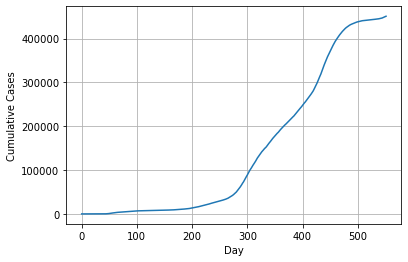

In [50]:
plt.plot(x,integral)
plt.xlabel('Day')
plt.ylabel('Cumulative Cases')
plt.grid()
plt.show()